In [13]:
import mrcfile
import numpy as np
from skimage.metrics import structural_similarity as ssim, mean_squared_error
import matplotlib.pyplot as plt

def compare_tomograms(tomo1_path, tomo2_path):
    """
    Compare two tomograms and calculate MSE and SSIM.

    Parameters:
        tomo1_path (str): Path to the first tomogram file (e.g., faket tomogram).
        tomo2_path (str): Path to the second tomogram file (e.g., basic tomogram).

    Returns:
        dict: A dictionary containing MSE, SSIM, and the difference array.
    """
    # Load the tomograms
    with mrcfile.open(tomo1_path, permissive=True) as mrc:
        tomo1 = np.copy(mrc.data)
    with mrcfile.open(tomo2_path, permissive=True) as mrc:
        tomo2 = np.copy(mrc.data)

    # Ensure the tomograms have the same shape
    if tomo1.shape != tomo2.shape:
        raise ValueError(f"Shape mismatch: {tomo1.shape} vs {tomo2.shape}")

    # Calculate MSE
    mse_val = mean_squared_error(tomo1, tomo2)

    # Calculate SSIM
    ssim_val = ssim(tomo1, tomo2, data_range=tomo2.max() - tomo2.min())

    # Calculate the difference
    difference = tomo1 - tomo2

    # Display the results
    print(f"MSE: {mse_val:.4f}")
    print(f"SSIM: {ssim_val:.4f}")
    print(f"tomo1_path is {tomo1_path}")
    print(f"tomo2_path is {tomo2_path}")
    tomo_id_1 = tomo1_path.split("/")[-1].split(".")[0]
    tomo_id_2 = tomo2_path.split("/")[-1].split(".")[0]
    print(f"Tomogram IDs: {tomo_id_1} vs {tomo_id_2}")
    print(f"Tomogram shapes: {tomo1.shape} vs {tomo2.shape}")
    # Visualize the difference
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    plt.title(f"Tomogram 1_{tomo_id_1}")
    plt.imshow(tomo1[tomo1.shape[0] // 2], cmap="gray")
    plt.colorbar()

    plt.subplot(1, 3, 2)
    plt.title(f"Tomogram 2_{tomo_id_2}")
    plt.imshow(tomo2[tomo2.shape[0] // 2], cmap="gray")
    plt.colorbar()

    plt.subplot(1, 3, 3)
    plt.title("Difference (Tomo1 - Tomo2)")
    plt.imshow(difference[tomo1.shape[0] // 2], cmap="seismic", vmin=-np.max(np.abs(difference)), vmax=np.max(np.abs(difference)))
    plt.colorbar()

    plt.tight_layout()
    plt.show()

    return {"MSE": mse_val, "SSIM": ssim_val, "Difference": difference}

Comparing /Users/yusufberkoruc/Desktop/Master_thesis/train_directory/static/ExperimentRuns_basic/tomogram_0_1/tomo_rec_1.mrc and /Users/yusufberkoruc/Desktop/Master_thesis/train_directory/static/ExperimentRuns_faket/tomogram_0_1/tomo_rec_faket_1.mrc
MSE: 2.0796
SSIM: 0.0905
tomo1_path is /Users/yusufberkoruc/Desktop/Master_thesis/train_directory/static/ExperimentRuns_faket/tomogram_0_1/tomo_rec_faket_1.mrc
tomo2_path is /Users/yusufberkoruc/Desktop/Master_thesis/train_directory/static/ExperimentRuns_basic/tomogram_0_1/tomo_rec_1.mrc
Tomogram IDs: tomo_rec_faket_1 vs tomo_rec_1
Tomogram shapes: (184, 630, 630) vs (184, 630, 630)


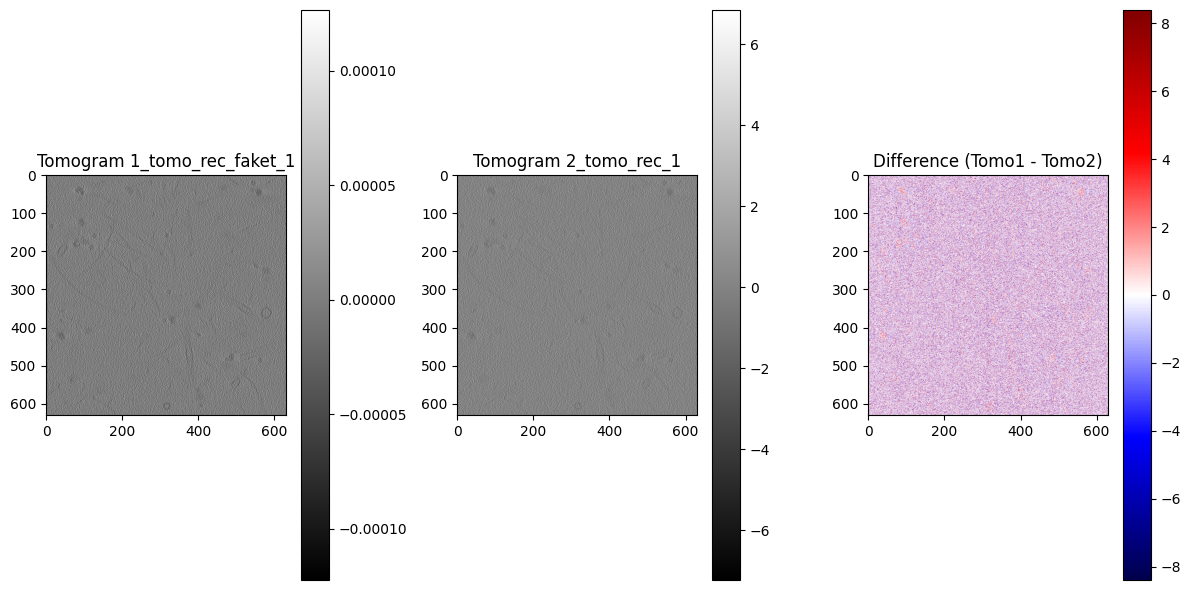

MSE: 2.1989
SSIM: 0.0110
tomo1_path is /Users/yusufberkoruc/Desktop/Master_thesis/train_directory/static/ExperimentRuns_basic/tomogram_0_1/tomo_rec_1.mrc
tomo2_path is /Users/yusufberkoruc/Desktop/Master_thesis/train_directory/static_1/ExperimentRuns_basic/tomogram_0_1/tomo_rec_1.mrc
Tomogram IDs: tomo_rec_1 vs tomo_rec_1
Tomogram shapes: (184, 630, 630) vs (184, 630, 630)


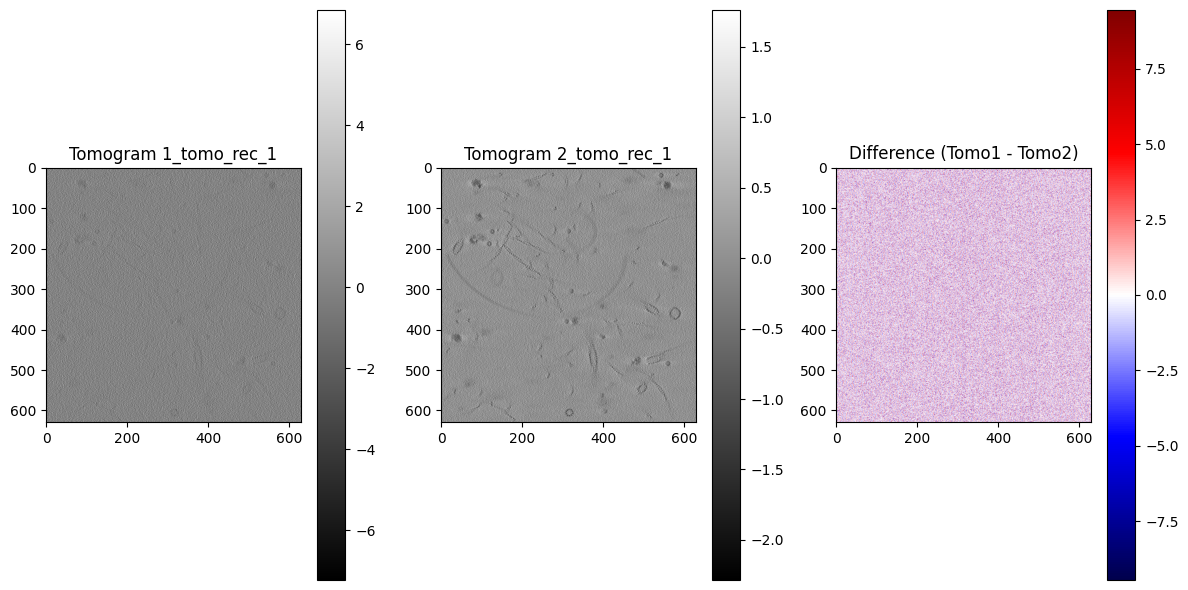

MSE: 2.1989
SSIM: 0.0110


Loaded tomogram: /Users/yusufberkoruc/Desktop/Master_thesis/train_directory/static/ExperimentRuns_basic/tomogram_0_1/tomo_rec_1.mrc
Loaded tomogram: /Users/yusufberkoruc/Desktop/Master_thesis/train_directory/static_1/ExperimentRuns_basic/tomogram_0_1/tomo_rec_1.mrc
Loaded tomogram: /Users/yusufberkoruc/Desktop/Master_thesis/train_directory/static/ExperimentRuns_faket/tomogram_0_1/tomo_rec_faket_1.mrc
Loaded tomogram: /Users/yusufberkoruc/Desktop/Master_thesis/train_directory/static_1/ExperimentRuns_faket/tomogram_0_1/tomo_rec_faket_1.mrc


In [14]:
import napari
import mrcfile
import numpy as np
import os

def visualize_tomograms(tomogram_paths):
    """
    Visualize reconstructed tomograms using Napari.

    Parameters:
        tomogram_paths (list): List of paths to the tomogram files (.mrc) to visualize.
    """
    viewer = napari.Viewer()

    for tomo_path in tomogram_paths:
        if not os.path.exists(tomo_path):
            print(f"File not found: {tomo_path}")
            continue

        # Load the tomogram
        with mrcfile.open(tomo_path, permissive=True) as mrc:
            tomo_data = np.copy(mrc.data)

        # Add the tomogram to the Napari viewer
        viewer.add_image(
            tomo_data,
            name=os.path.basename(tomo_path),
            colormap="gray",
            contrast_limits=(tomo_data.min(), tomo_data.max()),
        )
        print(f"Loaded tomogram: {tomo_path}")

    # Start the Napari event loop
    napari.run()

# Example usage
if __name__ == "__main__":
    # Define paths to the reconstructed tomograms
    tomogram_dir_basic = "/Users/yusufberkoruc/Desktop/Master_thesis/train_directory/static/ExperimentRuns_basic"
    tomogram_dir_basic_1 = "/Users/yusufberkoruc/Desktop/Master_thesis/train_directory/static_1/ExperimentRuns_basic"
    tomogram_dir_faket = "/Users/yusufberkoruc/Desktop/Master_thesis/train_directory/static/ExperimentRuns_faket"
    tomogram_dir_faket_1 = "/Users/yusufberkoruc/Desktop/Master_thesis/train_directory/static_1/ExperimentRuns_faket"
    tomogram_index = "0_1"
    tomo_index = tomogram_index.split("_")[-1]
    tomogram_paths_basic = [
        os.path.join(tomogram_dir_basic, f"tomogram_{tomogram_index}/tomo_rec_{tomo_index}.mrc"),
        os.path.join(tomogram_dir_basic_1, f"tomogram_{tomogram_index}/tomo_rec_{tomo_index}.mrc")]
    tomogram_paths_faket = [
        os.path.join(tomogram_dir_faket, f"tomogram_{tomogram_index}/tomo_rec_faket_{tomo_index}.mrc"),
        os.path.join(tomogram_dir_faket_1, f"tomogram_{tomogram_index}/tomo_rec_faket_{tomo_index}.mrc"),
    ]
   
    tomogram_paths = tomogram_paths_basic + tomogram_paths_faket
    # Compare the tomograms
    basic_image_path = tomogram_paths_basic[0]
    basic_image_path_1 = tomogram_paths_basic[1]
    faket_image_path = tomogram_paths_faket[0]
    faket_image_path_1 = tomogram_paths_faket[1]
    print(f"Comparing {basic_image_path} and {faket_image_path}")
    # Call the function to compare tomograms
    results = compare_tomograms(faket_image_path, basic_image_path)
    results = compare_tomograms(basic_image_path, basic_image_path_1)
    # Print the results
    print(f"MSE: {results['MSE']:.4f}")
    print(f"SSIM: {results['SSIM']:.4f}")
    # Visualize the tomograms
    visualize_tomograms(tomogram_paths)